In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# the csv file used "," due to which the data was unreadable so the delimiter was used to remove ";"
df = pd.read_csv("student-mat.csv", delimiter=";")

In [37]:
# Displaying the first few rows
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [102]:
print("Missing values:\n",df.isnull().sum())

Missing values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [99]:
print("\nData Types:\n", df.dtypes)


Data Types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [101]:
print("Dataset Size:", df.shape)

Dataset Size: (395, 33)


In [40]:
missing_values = df.isnull().sum().sum()
print(f"Total missing values: {missing_values}")


Total missing values: 0


In [41]:
# If missing values found.
# Handle missing values (replace with median)
df.fillna(df.median(numeric_only=True), inplace=True)

In [42]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [43]:
# If duplicate values found
# Remove duplicates
df.drop_duplicates(inplace=True)

In [45]:
# 1. What is the average score in math (G3)?
avg_math_score = df['G3'].mean()
print(f"The average score in math (G3) is: {avg_math_score:.2f}")

The average score in math (G3) is: 10.42


In [46]:
# 2. How many students scored above 15 in their final grade (G3)?
students_above_15 = df[df['G3'] > 15].shape[0]
percentage_above_15 = (students_above_15 / df.shape[0]) * 100
print(f"Number of students who scored above 15 in G3: {students_above_15}")
print(f"Percentage of students who scored above 15 in G3: {percentage_above_15:.2f}%")

Number of students who scored above 15 in G3: 40
Percentage of students who scored above 15 in G3: 10.13%


In [49]:
# 3. Is there a correlation between study time (studytime) and the final grade (G3)?
correlation = df['studytime'].corr(df['G3'])
print(f"Correlation between study time and final grade (G3): {correlation:.4f}")
# Interpreting the correlation
if abs(correlation) < 0.3:
    interpretation = "weak"
elif abs(correlation) < 0.7:
    interpretation = "moderate"
else:
    interpretation = "strong"

direction = "positive" if correlation > 0 else "negative"
if abs(correlation) < 0.01:
    conclusion = "There is almost no correlation between study time and final grade."
else:
    conclusion = f"There is a {interpretation} {direction} correlation between study time and final grade."

print(conclusion)

Correlation between study time and final grade (G3): 0.0978
There is a weak positive correlation between study time and final grade.


In [57]:
## 4. Which gender has a higher average final grade (G3)?
avg_by_gender = df.groupby('sex')['G3'].mean().round(2)
print("Average final grade (G3) by gender:")
print(avg_by_gender)

if avg_by_gender['F'] > avg_by_gender['M']:
    print("Female students have a higher average final grade.")
elif avg_by_gender['M'] > avg_by_gender['F']:
    print("Male students have a higher average final grade.")
else:
    print("Both genders have the same average final grade.")

Average final grade (G3) by gender:
sex
F     9.97
M    10.91
Name: G3, dtype: float64
Male students have a higher average final grade.


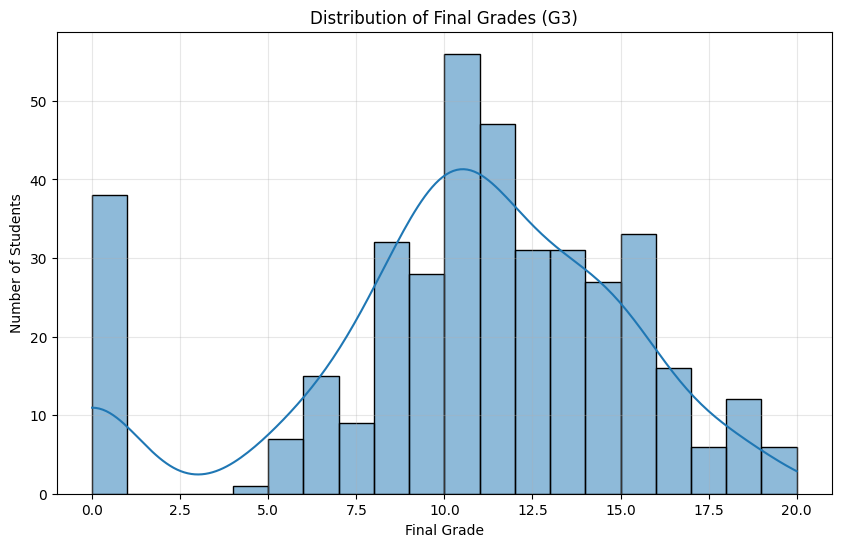

In [71]:
# 1. Plot a histogram of final grades (G3)
plt.figure(figsize=(10, 6))
sns.histplot(df['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Number of Students')
plt.grid(True, alpha=0.3)
plt.savefig('g3_histogram.png')

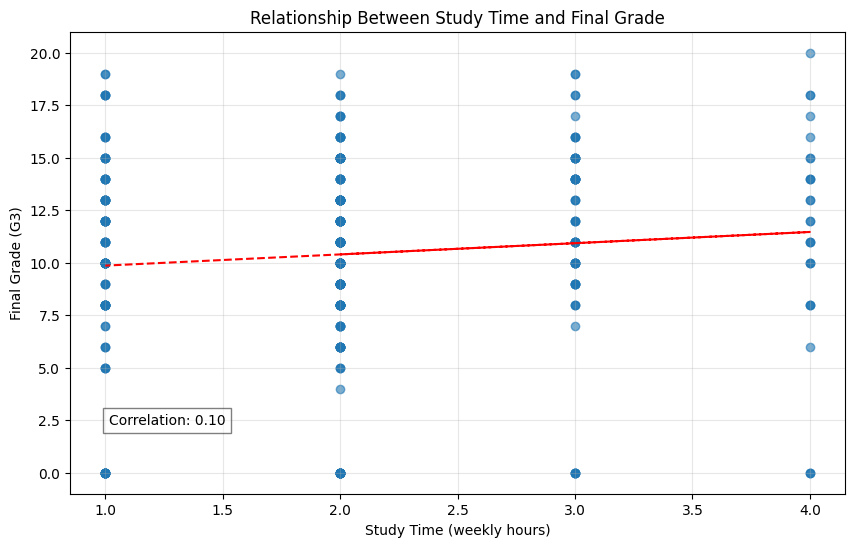

In [85]:
# 2. Create a scatter plot between study time (studytime) and final grade (G3)
plt.figure(figsize=(10, 6))
plt.scatter(df['studytime'], df['G3'], alpha=0.6)
plt.title('Relationship Between Study Time and Final Grade')
plt.xlabel('Study Time (weekly hours)')
plt.ylabel('Final Grade (G3)')
plt.grid(True, alpha=0.3)

# Adding a best fit line
x = df['studytime']
y = df['G3']
m, b = np.polyfit(x, y, 1)  # m=slope, b=intercept
plt.plot(x, m*x + b, color='red', linestyle='--')

# Add correlation coefficient to the plot
correlation = df['studytime'].corr(df['G3'])
plt.text(0.05, 0.15, f"Correlation: {correlation:.2f}", 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.5))

plt.savefig('studytime_vs_g3.png')


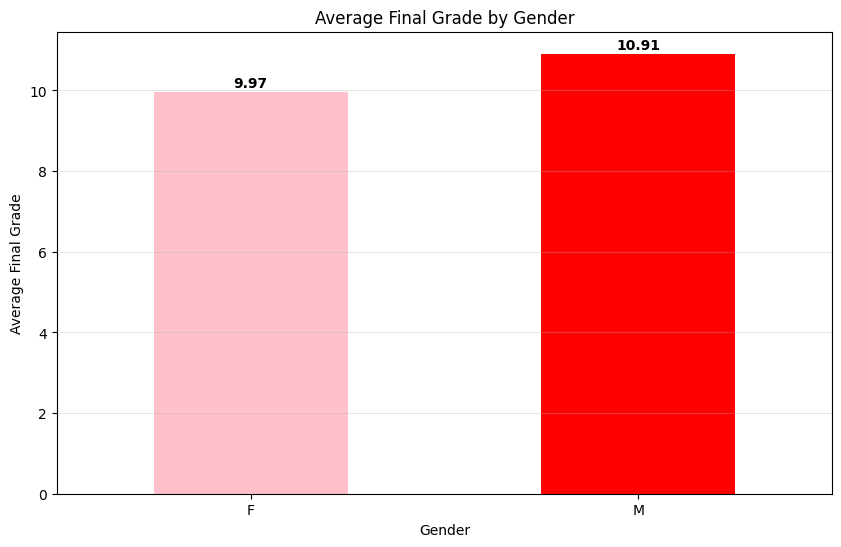

In [97]:
# Create a simple bar chart comparing grades by gender
plt.figure(figsize=(10, 6))  # Set the size of the plot (width, height in inches)

# Create a bar chart from our gender data
avg_by_gender.plot(kind='bar', color=['pink', 'red'])

# Add labels and title
plt.title('Average Final Grade by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade')

# Keep the x-axis labels horizontal (not rotated)
plt.xticks(rotation=0)

# Add grid lines (only horizontal ones)
plt.grid(axis='y',alpha= 0.3)

# Put the actual values on top of each bar
for i, value in enumerate(avg_by_gender):
    plt.text(i, value + 0.1, f"{value:.2f}", 
             horizontalalignment='center', 
             fontweight='bold')

# Save and show the plot
plt.savefig('gender_comparison.png')